In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ride_path = 'raw_data/ride_data.csv'
city_path = 'raw_data/city_data.csv'

ride_df = pd.read_csv(ride_path)
city_df = pd.read_csv(city_path)



In [168]:
ride_groupby = ride_df.groupby('city')

# Average Fare ($) Per City
avg_fare = ride_groupby['fare'].sum()/num_riders

# Total Number of Rides Per City
num_riders = ride_groupby['ride_id'].count()

# Total Number of Drivers Per City
num_drivers = city_df[['city','driver_count']]

# City Type (Urban, Suburban, Rural)
city_type = city_df[['city', 'type']]

avg_fare_rider_data = pd.DataFrame({'Average Fare':avg_fare, 'Total Number of Riders': num_riders})
avg_fare_rider_data_2 = avg_fare_rider_data.reset_index()

all_data = pd.merge(avg_fare_rider_data_2, city_df, on = 'city')
#all_data_type = all_data.groupby('type')

all_data_urban = all_data.loc[all_data['type'] == 'Urban',:]
all_data_suburban = all_data.loc[all_data['type'] == 'Suburban',:]
all_data_rural = all_data.loc[all_data['type'] == 'Rural',:]


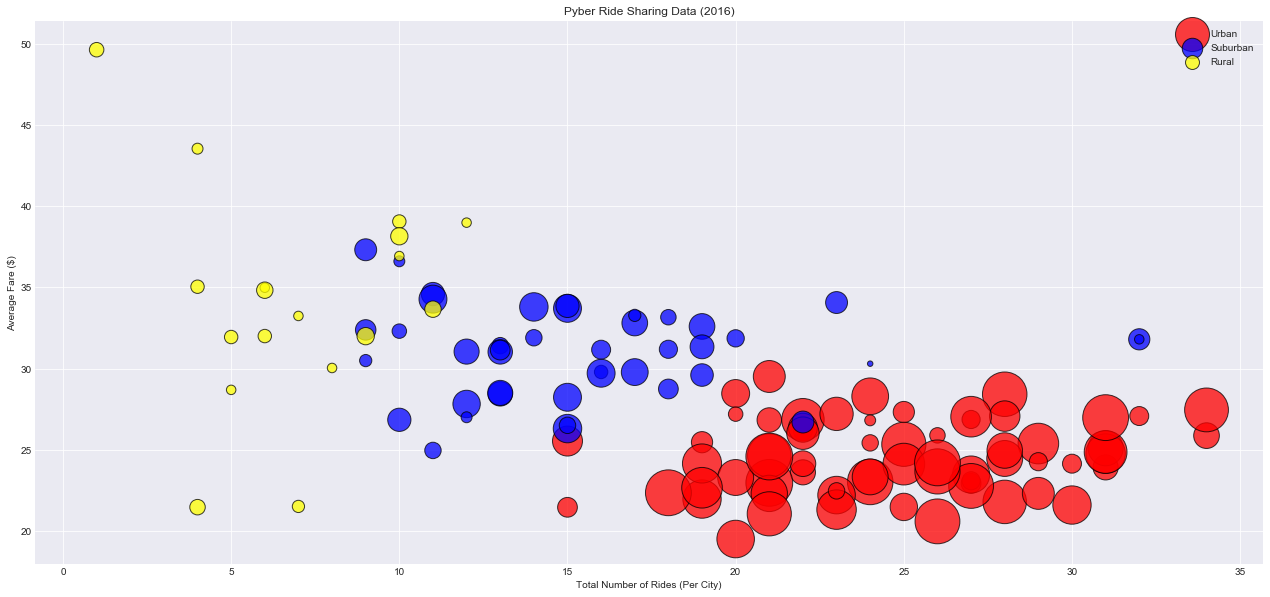

In [163]:
sns.set_style("darkgrid")


plt.figure(figsize=(22, 10))
labels = ['Urban','Suburban','Rural']

urban_plot = plt.scatter(all_data_urban['Total Number of Riders'], all_data_urban['Average Fare'], s = all_data_urban['driver_count']*30, facecolors="red", edgecolors="black",
            alpha=0.75)
plt.scatter(all_data_suburban['Total Number of Riders'], all_data_suburban['Average Fare'], s = all_data_suburban['driver_count']*30, facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.scatter(all_data_rural['Total Number of Riders'], all_data_rural['Average Fare'], s = all_data_rural['driver_count']*30, facecolors="yellow", edgecolors="black",
            alpha=0.75)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(labels)
plt.savefig("PyberRideSharingData.png")
plt.show()


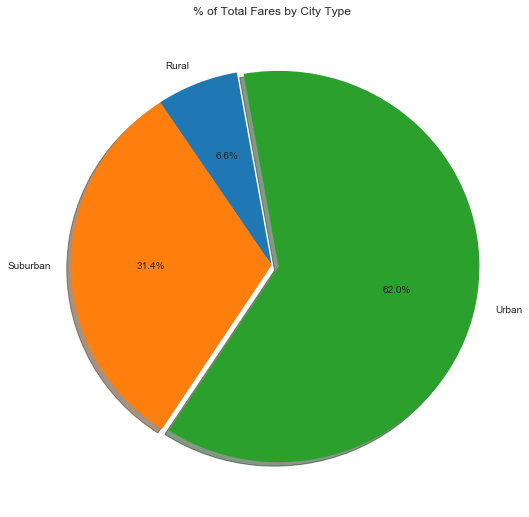

In [164]:
# % of Total Fares by City Type
avg_fare_type = all_data.groupby('type')

ride_data_2 = pd.merge(ride_df, city_df, on = 'city')
ride_data_2_groupby = ride_data_2.groupby('type')

#sum total fares by city type
fare_sum_ctiy_type = ride_data_2_groupby['fare'].sum()

#sum total fares
total_fares = fare_sum_ctiy_type.sum()

#percentage of fares by city type
per_fares_type = fare_sum_ctiy_type/total_fares*100

#show table
explode = [0, 0, 0.035]

fare_chart  = per_fares_type.plot(kind='pie', autopct="%1.1f%%",figsize=(9,9), explode = explode, shadow=True, startangle=100)
plt.title("% of Total Fares by City Type")
plt.ylabel('')
plt.savefig("Percent of Total Fares by City Type.png")
plt.show()



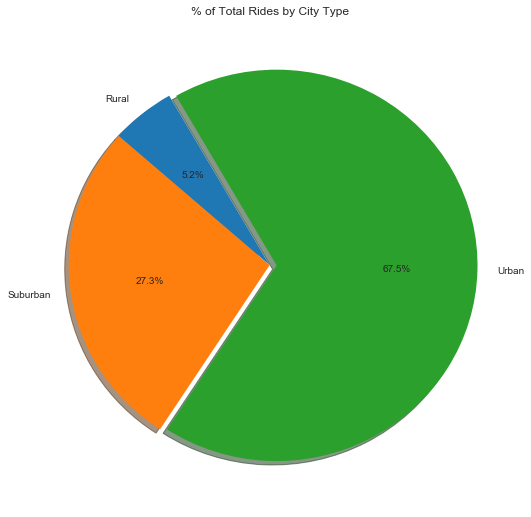

In [165]:
# % of Total Rides by City Type
avg_fare_type = all_data.groupby('type')

#sum total fares by city type
riders_ctiy_type = avg_fare_type['Total Number of Riders'].sum()

#sum total fares
total_riders = riders_ctiy_type.sum()

#percentage of fares by city type
per_riders_type = riders_ctiy_type/total_riders*100

#show table
explode = [0, 0, 0.035]
per_riders_type.plot(kind='pie', autopct="%1.1f%%",figsize=(9,9), explode = explode, shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")
plt.savefig("Percent of Total Rides by City Type.png")
plt.ylabel('')
plt.show()


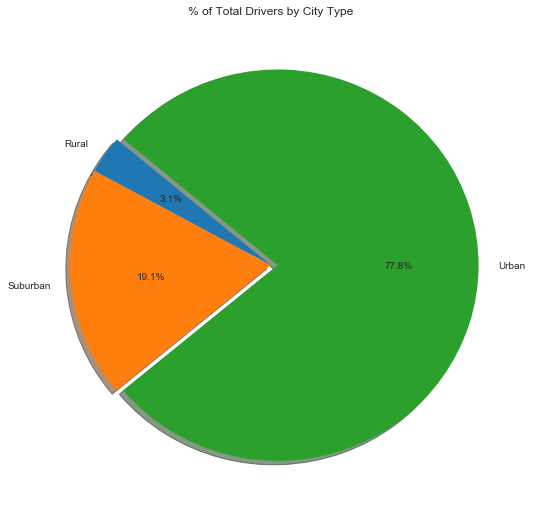

In [166]:
# % of Total Drivers by City Type
avg_fare_type = all_data.groupby('type')

#sum total fares by city type
drivers_ctiy_type = avg_fare_type['driver_count'].sum()

#sum total fares
total_drivers = drivers_ctiy_type.sum()

#percentage of fares by city type
per_drivers_type = drivers_ctiy_type/total_drivers*100

#show table
explode = [0, 0, 0.035]
per_drivers_type.plot(kind='pie', autopct="%1.1f%%",figsize=(9,9), explode = explode, shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.savefig("Percent of Total Drivers by City Type.png")
plt.ylabel('')
plt.show()